In [ ]:
#importando as bibliotecas iniciais
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
#importando os dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

#organizando a distribuicao dos dados

colunas = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]

In [4]:
import pandas as pd
#vizualizacao inicial de dados
df = pd.read_csv(url, names=colunas)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
#vizualizando informacoes gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.shape

(8124, 23)

In [35]:
#vizualizando dados estatisticos
df.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
#analisando resumo de algumas colunas
#melhorando a vizualizacao das estatísticas
df.describe(include="all").T.head(12)

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [13]:
#verificando valores ausentes
(df == '?').sum().sort_values(ascending=False).head(10)

,0
stalk-root,2480
cap-shape,0
class,0
cap-color,0
bruises,0
odor,0
cap-surface,0
gill-attachment,0
gill-spacing,0
gill-color,0


In [14]:
# Distribuição da classe (e=edible, p=poisonous)
df["class"].value_counts(normalize=True).rename({"e":"edible","p":"poisonous"})

,proportion
class,
edible,0.517971
poisonous,0.482029


In [17]:
import numpy as np
# Trocar '?' por NaN
df2 = df.replace('?', np.nan)

In [18]:
# % de faltantes por coluna
faltantes = df2.isna().mean().sort_values(ascending=False)
faltantes.head(10)

,0
stalk-root,0.305268
cap-shape,0.000000
class,0.000000
cap-color,0.000000
bruises,0.000000
odor,0.000000
cap-surface,0.000000
gill-attachment,0.000000
gill-spacing,0.000000
gill-color,0.000000


In [20]:
#remover linhas com NaN
df_clean = df2.dropna(axis=0).reset_index(drop=True)

# Separar X e y
X = df_clean.drop(columns=["class"])
y = df_clean["class"]

In [21]:
# Treino/Teste com estratificação
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [22]:
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

((4515, 22),
 (1129, 22),
 class
 e    0.61794
 p    0.38206
 Name: proportion, dtype: float64,
 class
 e    0.618246
 p    0.381754
 Name: proportion, dtype: float64)

In [24]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

cat_cols = X_train.columns.tolist()

#OneHot para todas as colunas
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(random_state=42))
])

clf

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [25]:
#Treinar
clf.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [26]:
#prever
y_pred = clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#metricas
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["edible (e)", "poisonous (p)"]))

Acurácia: 1.0
               precision    recall  f1-score   support

   edible (e)       1.00      1.00      1.00       698
poisonous (p)       1.00      1.00      1.00       431

     accuracy                           1.00      1129
    macro avg       1.00      1.00      1.00      1129
 weighted avg       1.00      1.00      1.00      1129



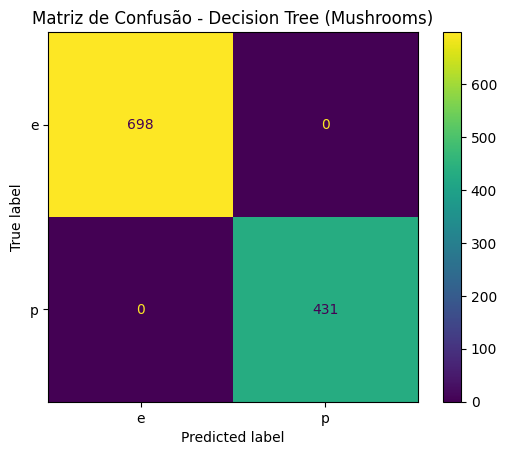

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# Matriz de confusão
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusão - Decision Tree (Mushrooms)")
plt.show()

In [32]:
import numpy as np

# Pegar nomes das features após o OneHot
ohe = clf.named_steps["prep"].named_transformers_["cat"]
feature_names = ohe.get_feature_names_out(cat_cols)

# Importâncias do modelo
dt = clf.named_steps["model"]
importances = dt.feature_importances_

# Top 20
idx = np.argsort(importances)[::-1][:20]
top_feats = feature_names[idx]
top_imps  = importances[idx]

pd.DataFrame({"feature": top_feats, "importance": top_imps})


,feature,importance
0,odor_f,0.634388
1,gill-size_n,0.172022
2,stalk-shape_e,0.058201
3,spore-print-color_r,0.054028
4,odor_n,0.050426
5,stalk-color-above-ring_c,0.022309
6,population_c,0.008625
7,habitat_p,0.000000
8,habitat_m,0.000000
9,habitat_u,0.000000


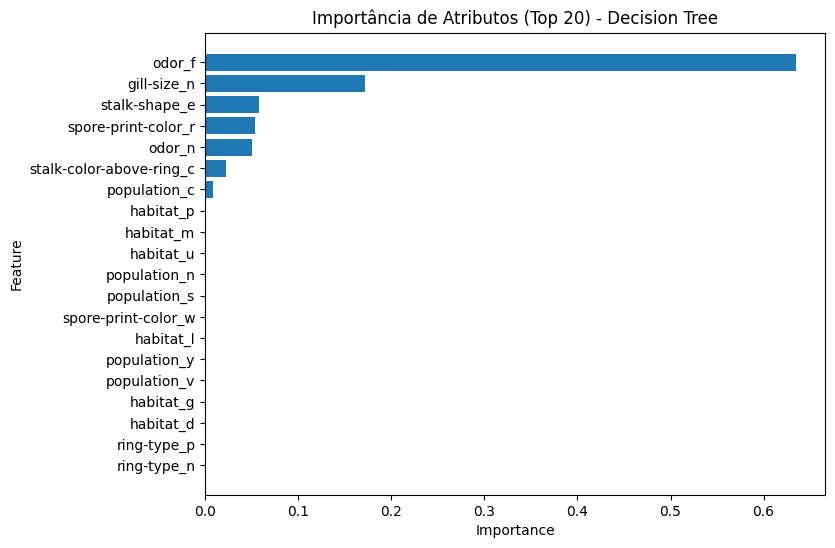

In [33]:
# Plot das top 20 importâncias
plt.figure(figsize=(8,6))
plt.barh(top_feats[::-1], top_imps[::-1])
plt.title("Importância de Atributos (Top 20) - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [34]:
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=list(feature_names))
print(tree_text[:2000])


|--- odor_f <= 0.50
|   |--- gill-size_n <= 0.50
|   |   |--- spore-print-color_r <= 0.50
|   |   |   |--- stalk-color-above-ring_c <= 0.50
|   |   |   |   |--- class: e
|   |   |   |--- stalk-color-above-ring_c >  0.50
|   |   |   |   |--- class: p
|   |   |--- spore-print-color_r >  0.50
|   |   |   |--- class: p
|   |--- gill-size_n >  0.50
|   |   |--- odor_n <= 0.50
|   |   |   |--- stalk-shape_e <= 0.50
|   |   |   |   |--- class: e
|   |   |   |--- stalk-shape_e >  0.50
|   |   |   |   |--- class: p
|   |   |--- odor_n >  0.50
|   |   |   |--- population_c <= 0.50
|   |   |   |   |--- class: e
|   |   |   |--- population_c >  0.50
|   |   |   |   |--- class: p
|--- odor_f >  0.50
|   |--- class: p

